In [137]:
import pandas as pd
from matplotlib import pyplot as plt

df = pd.read_csv('../../data/ST001937_AN003150.csv')

Dropping not needed columns and renaming the Phenotypes column to labels

In [138]:
df = df.drop(['Sample ID', 'RAW_FILE_NAME'], axis=1)
df['Phenotypes'] = df['Phenotypes'].apply(lambda x: 0 if x == 'Healthy Controls' else 1 if x == 'Maligant SPNS' else 2)

Filling missing values with the mean

In [139]:
df.fillna(df.mean(), inplace=True)

Performing SVM RBF classification and plotting the results

In [140]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix
import numpy as np
import seaborn as sns

# Splitting the data into features (X) and labels (y)
X = df.drop('Phenotypes', axis=1)
y = df['Phenotypes']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [141]:
#creating a np matrix for the grid search
gamma_values = np.arange(0, 0.0125, 0.00005)
c_values = np.arange(0.2, 50.2, 0.2)
scores = np.zeros((len(gamma_values), len(c_values)))
scores.shape

(250, 250)

In [142]:

# Grid search
for i, gamma in enumerate(gamma_values):
    for j, c in enumerate(c_values):
        svm = SVC(kernel='rbf', gamma=gamma, C=c)
        svm.fit(X_train, y_train)
        scores[i, j] = svm.score(X_test, y_test)


In [169]:

#getting the best score
best_score = np.max(scores)
print('Best score:', best_score)

#printing gamma a c values for the best score
best_gamma = gamma_values[np.argmax(scores) // scores.shape[1]]
best_c = c_values[np.argmax(scores) % scores.shape[1]]
print('Best gamma: {:.7f}'.format(best_gamma))
print('Best C:', best_c)

Best score: 0.8189655172413793
Best gamma: 0.0008500
Best C: 13.2


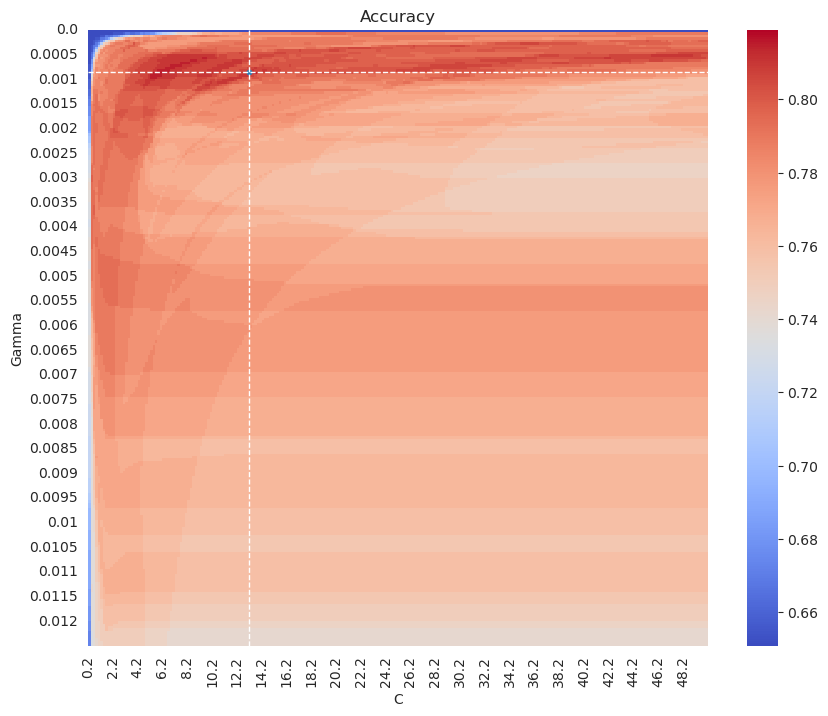

In [186]:
# Plotting the results
plt.figure(figsize=(10, 8))
sns.heatmap(scores, xticklabels=c_values, yticklabels=gamma_values, cmap=cm.coolwarm)

#plot grid and labels avery 10th value rounded to 2 decimals
plt.xticks(np.arange(len(c_values))[::10], c_values[::10])
plt.yticks(np.arange(len(gamma_values))[::10], np.round(gamma_values[::10], 6))
plt.axvline(np.argmax(scores) % scores.shape[1], color='white', linestyle='dashed', linewidth=1)
plt.axhline(np.argmax(scores) // scores.shape[1], color='white', linestyle='dashed', linewidth=1)
plt.scatter(np.argmax(scores) % scores.shape[1], np.argmax(scores) // scores.shape[1], marker='o', s=10)
plt.xlabel('C')
plt.ylabel('Gamma')
plt.title('Accuracy')
plt.show()


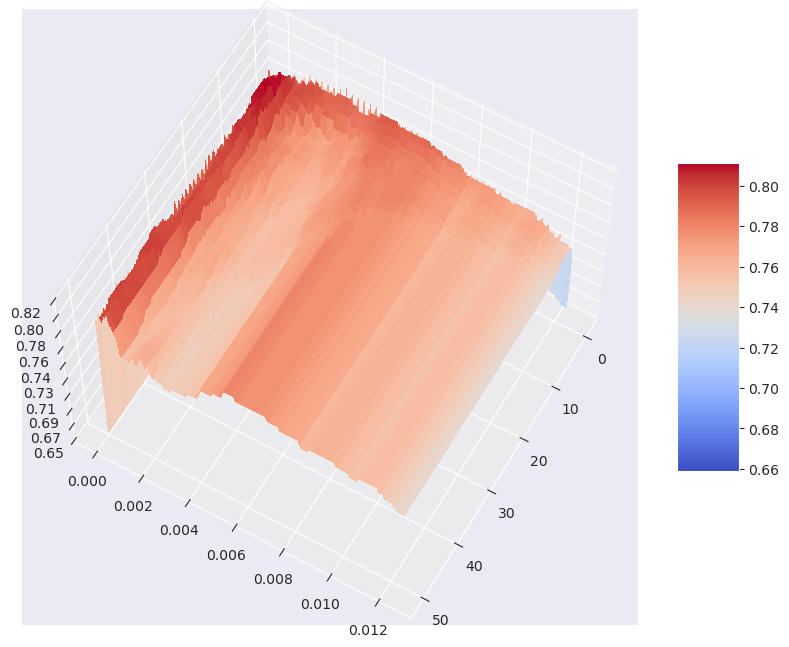

In [221]:
import matplotlib.pyplot as plt
import numpy as np

from matplotlib import cm
from matplotlib.ticker import LinearLocator

plt.rcParams['figure.figsize'] = [10, 8]
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

# Make data.
X = gamma_values
Y = c_values
X, Y = np.meshgrid(Y, X)
Z = scores

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm, linewidth=0, antialiased=False)

# Customize the z axis.
ax.zaxis.set_major_locator(LinearLocator(10))
# A StrMethodFormatter is used automatically
ax.zaxis.set_major_formatter('{x:.02f}')

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

#rotate the graph
ax.view_init(60, 30)


plt.show()